**Importar librerias**

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Cagar csv

In [64]:
df = pd.read_csv('weather_prediction_dataset.csv', header = 0)

### Inspecciono la cabecera

In [65]:
df.shape[0]

3654

###  El dataset tiene 165 columnas, pero son los mismos valores para ciudades distintas, porlo que quizas se pueda hacer una agrupación

In [66]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [67]:
df

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3649,20091228,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,...,-2.7,2.4,3.7,0.95,1.0011,0.22,1.50,6.2,1.8,10.6
3650,20091229,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,...,-9.5,0.8,5.3,0.89,0.9966,0.24,0.40,10.4,6.2,14.5
3651,20091230,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,...,-12.5,-7.4,3.8,0.88,0.9939,0.24,1.00,10.0,8.7,11.3
3652,20091231,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,...,-9.3,-6.5,4.2,0.88,0.9933,0.58,0.02,8.5,6.2,10.9


### Target predecir las temperaturas de cada ciuidad y la categoria del tiempo que va a hacer

In [68]:
print(df.columns)

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_sunshine', 'BASEL_temp_mean', 'BASEL_temp_min',
       ...
       'STOCKHOLM_temp_min', 'STOCKHOLM_temp_max', 'TOURS_wind_speed',
       'TOURS_humidity', 'TOURS_pressure', 'TOURS_global_radiation',
       'TOURS_precipitation', 'TOURS_temp_mean', 'TOURS_temp_min',
       'TOURS_temp_max'],
      dtype='object', length=165)


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Columns: 165 entries, DATE to TOURS_temp_max
dtypes: float64(150), int64(15)
memory usage: 4.6 MB


In [70]:
df.describe()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
count,3.654000e+03,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,...,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000,3654.000000
mean,2.004568e+07,6.520799,5.418446,0.745107,1.017876,1.330380,0.234849,4.661193,11.022797,6.989135,...,5.104215,11.470635,3.677258,0.781872,1.016639,1.369787,0.186100,12.205802,7.860536,16.551779
std,2.874287e+04,3.450083,2.325497,0.107788,0.007962,0.935348,0.536267,4.330112,7.414754,6.653356,...,7.250744,8.950217,1.519866,0.115572,0.018885,0.926472,0.422151,6.467155,5.692256,7.714924
min,2.000010e+07,1.000000,0.000000,0.380000,0.985600,0.050000,0.000000,0.000000,-9.300000,-16.000000,...,-19.700000,-14.500000,0.700000,0.330000,0.000300,0.050000,0.000000,-6.200000,-13.000000,-3.100000
25%,2.002070e+07,4.000000,4.000000,0.670000,1.013300,0.530000,0.000000,0.500000,5.300000,2.000000,...,0.000000,4.100000,2.600000,0.700000,1.012100,0.550000,0.000000,7.600000,3.700000,10.800000
50%,2.004567e+07,7.000000,6.000000,0.760000,1.017700,1.110000,0.000000,3.600000,11.400000,7.300000,...,5.000000,11.000000,3.400000,0.800000,1.017300,1.235000,0.000000,12.300000,8.300000,16.600000
75%,2.007070e+07,10.000000,7.000000,0.830000,1.022700,2.060000,0.210000,8.000000,16.900000,12.400000,...,11.200000,19.000000,4.600000,0.870000,1.022200,2.090000,0.160000,17.200000,12.300000,22.400000
max,2.010010e+07,12.000000,8.000000,0.980000,1.040800,3.550000,7.570000,15.300000,29.000000,20.800000,...,21.200000,32.900000,10.800000,1.000000,1.041400,3.560000,6.200000,31.200000,22.600000,39.800000


In [71]:
df_basel = df.iloc[:,1:11]
df_STOCKHOLM = df.iloc[:,12:22]






In [72]:
df_basel

,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max
0,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9
1,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8
2,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8
3,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5
4,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6
...,...,...,...,...,...,...,...,...,...,...
3649,12,7,0.82,1.0084,0.28,0.42,0.3,3.2,1.0,4.8
3650,12,7,0.92,1.0028,0.22,1.68,0.2,4.5,2.4,10.0
3651,12,8,0.92,0.9979,0.07,1.54,0.0,8.5,7.5,11.5
3652,12,7,0.93,0.9958,0.17,0.57,0.1,6.6,4.3,7.9


In [73]:

def mes_a_estacion(mes):
    if mes in [12, 1, 2]:
        return "Invierno"
    elif mes in [3, 4, 5]:
        return "Primavera"
    elif mes in [6, 7, 8]:
        return "Verano"
    else:
        return "Otoño"

df['ESTACION'] = df['MONTH'].apply(mes_a_estacion)


In [74]:
from sklearn.model_selection import train_test_split


X = df_basel.loc[:, 'BASEL_humidity':'BASEL_temp_max'].values
y = df['ESTACION'].values
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.20,
                                                    random_state=55)

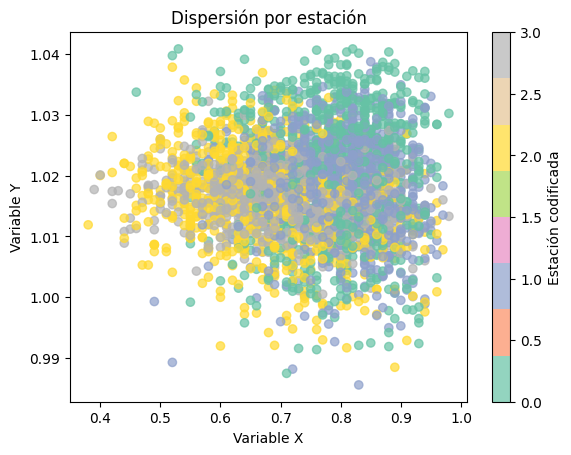

In [75]:
import matplotlib.pyplot as plt

# Convertir las estaciones a números (0–3)
colores = df['ESTACION'].astype('category').cat.codes

plt.scatter(X[:, 0], X[:, 1], c=colores, cmap='Set2', alpha=0.7)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.title('Dispersión por estación')
plt.colorbar(label='Estación codificada')
plt.show()


In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold
cv = KFold(10)
rnd_clf = RandomForestClassifier(n_estimators=500,
                                 max_depth=8,
                                 random_state=42)


In [78]:
rnd_clf.fit(X_train, y_train)
importancias = rnd_clf.feature_importances_

In [79]:
print(importancias)

[0.10211352 0.06379139 0.18617529 0.03841742 0.06566564 0.19908654
 0.19396859 0.15078161]


In [80]:
scores1 = cross_val_score(rnd_clf, X_train, y_train, cv=cv)  # cv=10 aplica validación cruzada de 10 folds
print("Accuracy por fold:", scores1.mean())
print("Accuracy max:", scores1.max())

Accuracy por fold: 0.7482011781756978
Accuracy max: 0.7815699658703071


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100 , 150 ,200],
    'max_leaf_nodes': [5, 10, 15, 20, 30 ,40],
    'max_features': [2,3, 4, 6]
}


grid_search = GridSearchCV(estimator=rnd_clf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

grid_search.fit(X_train,y_train)
gs_rfc = GridSearchCV(rnd_clf, param_grid, scoring="accuracy", cv = 5, verbose=3, n_jobs=1)
gs_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_features=2, max_leaf_nodes=10, n_estimators=50;, score=0.677 total time=   0.1s
[CV 2/5] END max_features=2, max_leaf_nodes=10, n_estimators=50;, score=0.699 total time=   0.1s
[CV 3/5] END max_features=2, max_leaf_nodes=10, n_estimators=50;, score=0.685 total time=   0.1s
[CV 4/5] END max_features=2, max_leaf_nodes=10, n_estimators=50;, score=0.697 total time=   0.1s
[CV 5/5] END max_features=2, max_leaf_nodes=10, n_estimators=50;, score=0.707 total time=   0.3s
[CV 1/5] END max_features=2, max_leaf_nodes=10, n_estimators=100;, score=0.687 total time=   0.9s
[CV 2/5] END max_features=2, max_leaf_nodes=10, n_estimators=100;, score=0.699 total time=   0.9s
[CV 3/5] END max_features=2, max_leaf_nodes=10, n_estimators=100;, score=0.677 total time=   1.2s
[CV 4/5] END max_features=2, max_leaf_nodes=10, n_estimators=100;, score=0.699 total time=   0.9s
[CV 5/5] END max_features=2, max_leaf_nodes=10, n_estimators=1

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=500,
                                              random_state=42),
             n_jobs=1,
             param_grid={'max_features': [2, 4, 6],
                         'max_leaf_nodes': [10, 20, 30],
                         'n_estimators': [50, 100]},
             scoring='accuracy', verbose=3)

In [57]:
print(gs_rfc.best_estimator_)
print(gs_rfc.best_score_)

RandomForestClassifier(max_depth=8, max_features=6, max_leaf_nodes=30,
                       random_state=42)
0.7399988291769114


In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
punto_nuevo = [[0.89, 1.0286, 0.20, 0.03, 0.0, 2.9, 1.6, 3.9]]


In [82]:
for k in range(3,15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    print('K=',k)
    print(knn.predict(punto_nuevo))
    print(knn.predict_proba(punto_nuevo))
    print('-'*50)

K= 3
['Invierno']
[[0.66666667 0.33333333 0.         0.        ]]
--------------------------------------------------
K= 4
['Invierno']
[[0.75 0.25 0.   0.  ]]
--------------------------------------------------
K= 5
['Invierno']
[[0.8 0.2 0.  0. ]]
--------------------------------------------------
K= 6
['Invierno']
[[0.83333333 0.16666667 0.         0.        ]]
--------------------------------------------------
K= 7
['Invierno']
[[0.85714286 0.14285714 0.         0.        ]]
--------------------------------------------------
K= 8
['Invierno']
[[0.875 0.125 0.    0.   ]]
--------------------------------------------------
K= 9
['Invierno']
[[0.88888889 0.11111111 0.         0.        ]]
--------------------------------------------------
K= 10
['Invierno']
[[0.9 0.1 0.  0. ]]
--------------------------------------------------
K= 11
['Invierno']
[[0.90909091 0.09090909 0.         0.        ]]
--------------------------------------------------
K= 12
['Invierno']
[[0.91666667 0.08333333 0.